In [47]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

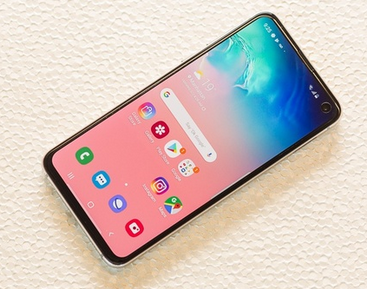

In [48]:
image = cv.imread('drive/My Drive/Bootcamp_Images/phones.png')

image_orig = image.copy()

cv2_imshow(image)

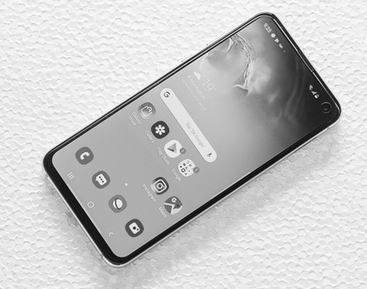

In [49]:
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

cv2_imshow(image)

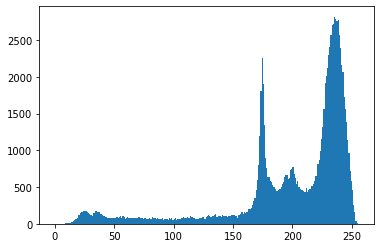

In [50]:
plt.hist(image.flatten(), 256, [0,256])
plt.show()

127.0


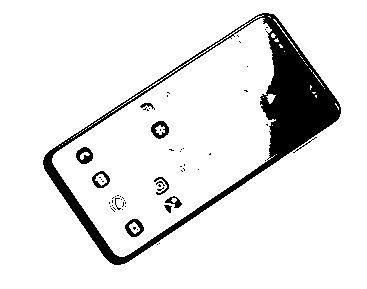

In [51]:
threshold_value, threshold_result = cv.threshold(image, 127, 255, cv.THRESH_BINARY)

print(threshold_value)

cv2_imshow(threshold_result)

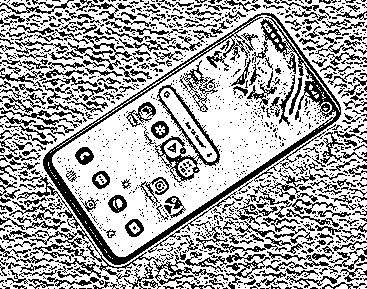

In [52]:
thresholding_result = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

cv2_imshow(thresholding_result)

145.0


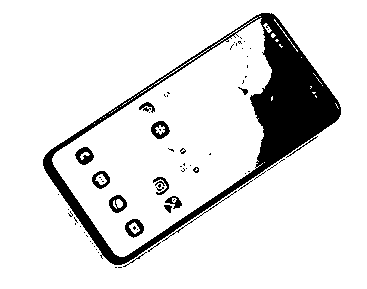

In [53]:
thresholding_value, thresholding_result = cv.threshold(image, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
print(thresholding_value)
cv2_imshow(thresholding_result)

## Extracting Objects from Contours

In [54]:
thresholding_result = cv.bitwise_not(thresholding_result)

contours, hierarchy = cv.findContours(thresholding_result, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

print(contours)

[array([[[118, 267]],

       [[121, 267]]], dtype=int32), array([[[115, 267]],

       [[116, 267]]], dtype=int32), array([[[145, 252]],

       [[143, 254]],

       [[142, 254]],

       [[140, 256]],

       [[139, 256]],

       [[137, 258]],

       [[136, 258]],

       [[134, 260]],

       [[133, 260]],

       [[131, 262]],

       [[130, 262]],

       [[128, 264]],

       [[127, 264]],

       [[126, 265]],

       [[125, 265]],

       [[124, 266]],

       [[123, 266]],

       [[125, 266]],

       [[127, 264]],

       [[128, 264]],

       [[130, 262]],

       [[132, 262]],

       [[136, 258]],

       [[139, 258]],

       [[139, 257]],

       [[141, 255]],

       [[142, 255]],

       [[145, 252]],

       [[146, 252]]], dtype=int32), array([[[ 98, 252]]], dtype=int32), array([[[ 96, 249]]], dtype=int32), array([[[ 94, 246]]], dtype=int32), array([[[ 92, 243]]], dtype=int32), array([[[160, 242]],

       [[159, 243]],

       [[158, 243]],

       [[155, 246]],


In [55]:
len(contours)

23

In [56]:
contours[0]

array([[[118, 267]],

       [[121, 267]]], dtype=int32)

## Feature Extraction of Contours

In [57]:
area = cv.contourArea(contours[0])

area

0.0

In [58]:
x, y, w, h = cv.boundingRect(contours[0])

print(x, y, w, h)

118 267 4 1


In [59]:
for index, contour in enumerate(contours):
  x, y, w, h = cv.boundingRect(contour)
  area = cv.contourArea(contour)

  print("Contour #" + str(index), x, y, w, h, area)


Contour #0 118 267 4 1 0.0
Contour #1 115 267 2 1 0.0
Contour #2 123 252 24 15 6.5
Contour #3 98 252 1 1 0.0
Contour #4 96 249 1 1 0.0
Contour #5 94 246 1 1 0.0
Contour #6 92 243 1 1 0.0
Contour #7 148 242 13 10 4.0
Contour #8 90 241 1 1 0.0
Contour #9 86 235 2 2 0.0
Contour #10 84 232 1 1 0.0
Contour #11 80 226 1 1 0.0
Contour #12 75 223 1 2 0.0
Contour #13 74 217 4 6 1.0
Contour #14 68 211 5 6 1.5
Contour #15 68 209 1 1 0.0
Contour #16 58 194 1 1 0.0
Contour #17 162 191 75 51 11.5
Contour #18 238 180 15 11 3.0
Contour #19 254 171 12 9 0.0
Contour #20 267 163 11 8 0.0
Contour #21 279 159 6 4 0.0
Contour #22 43 13 298 252 37097.0


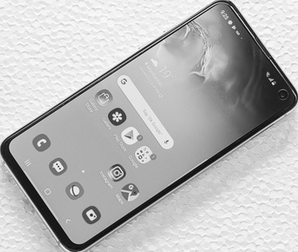

In [60]:
x, y, w, h = cv.boundingRect(contours[22])

phone = image[y:y+h, x:x+w]

cv2_imshow(phone)

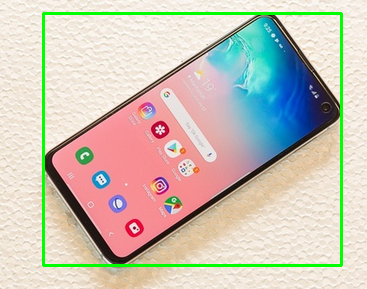

In [64]:
cv.rectangle(image_orig, (x,y), (x+w,y+h), (0,255,0), 2)

cv2_imshow(image_orig)

# Assignments

Lakukan segmentasi untuk semua foto yang diberikan! Berikut adalah beberapa catatan yang perlu diingat:
  - Berikan bounding box berwarna **biru** untuk masing-masing object yang dideteksi
  - Tunjukan panjang dan tinggi dari objek di kanan atas dari bouding box yang dibuat!
  - Jelaskan proses preprocessing yang dilakukan sebelum dilakukannya ekstraksi contour!